## Лабораторная работа 3

In [177]:
import scipy.stats as stat
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools

### I. Различные доверительные интервалы.

In [104]:
def in_range(x, interval):
    a, b = interval
    if a <= x <= b:
        return True
    return False

In [105]:
def group_data(data, k):
    
    # переведем ряд в вариационный и вычислим начальную и конечную точку
    x0 = math.floor(min(data))
    xn = math.ceil(max(data))
    
    # найдем границы отрезков
    interval_size = (xn - x0) / k
    bounds = [x0 + i * interval_size for i in range(k + 1)]
    
    # выделим отрезки
    a, b = itertools.tee(bounds)
    next(b, None)
    intervals = list(zip(a, b))
    
    # найдем серидины интервалов
    intervals_mids = [(a + b) / 2 for (a, b) in intervals]
    
    grouped = np.zeros(np.size(data))
    
    for i in range(np.size(data)):
        # находим индекс интервала в который попадает точка исходной выборки
        entry_group = [j for j in range(k) if in_range(data[i], intervals[j])][0]
        # группируем, записывая в финальный массив значение серидины интервала в который попала текущая точка
        grouped[i] = intervals_mids[entry_group]
        
    return grouped

In [106]:
def interval_poisson_theta(poisson, n):
    
    u_half_alpha = -stat.norm.ppf(alpha / 2)
    
    poission_high = np.mean(poisson) + u_half_alpha / n**0.5
    poission_low = np.mean(poisson) - u_half_alpha / n**0.5
    
    return poission_low, poission_high

In [107]:
def interval_binominal_p(binominal, n, p):
    
    m=np.sum(binom)
    u_half_alpha = -stat.norm.ppf(alpha / 2)

    binominal_high = m / n + u_half_alpha * (m * (n - m) / n)**0.5 / n
    binomianl_low = m / n - u_half_alpha * (m * (n - m) / n)**0.5 / n
    
    return binomianl_low, binominal_high

In [108]:
def interval_exponent_lambda(exp, n):
    
    u_half_alpha = -stat.norm.ppf(alpha / 2)

    exponent_high = (1 + u_half_alpha / n**0.5) / np.mean(exp)
    exponent_low = (1 - u_half_alpha / n**0.5) / np.mean(exp)
    
    return exponent_low, exponent_high

In [180]:
n = 200
alpha = 0.05
k = 8

#### 1.Распределение пуассона.

In [110]:
theta = 6

poisson = np.random.default_rng().poisson(theta, n)
theta_lower, theta_higher = interval_poisson_theta(poisson, n)

print(f'{theta_lower} :THETA- >  THETA  > THETA+: {theta_higher}')

5.8864096175650324 :THETA- >  THETA  > THETA+: 6.163590382434968


#### 2.Распределение биноминальное.

In [111]:
p = 0.4

binom = np.random.binomial(n=n, p=p)
p_lower, p_higher = interval_binominal_p(binom, n, p)

print(f'{p_lower} :P- >  P  > P+: {p_higher}')

0.3369670837271852 :P- >  P  > P+: 0.47303291627281485


#### 3. Распределение экспоненциальное.

In [112]:
exp_lambda = 7

exp = np.random.default_rng().exponential(1 / exp_lambda, n)
lambda_lower, lambda_higher = interval_exponent_lambda(exp, n)

print(f'{lambda_lower} :LAMBDA- >  LAMBDA  > LAMBDA+: {lambda_higher}')

6.4373945243455974 :LAMBDA- >  LAMBDA  > LAMBDA+: 8.508792267815696


### II. Ядерные оценки.

In [126]:
# гауссовская функция плотности вероятности
def gauss_pdf(x, x_i, h):
    return stat.norm.pdf((x - x_i)/h)

# гауссовское ядро
def gauss_kernel(x, h, sample):
    return 1 / (n * h) * sum([stat.norm.pdf((x - x_i) / h) for x_i in sample])

In [127]:
def uniform_pdf(x, a, b):
    return 1 / (b - a) if a<=x<=b else 0

def uniform_kernel(x, h, sample):
    return 1 / (n * h) * sum([uniform_pdf((x - x_i) / h, -1, 1) for x_i in sample])

In [128]:
def gauss_estimation(gauss, gauss_exp, gauss_var):
    h = 1.06 * np.std(gauss) / n**0.2
    grid = np.linspace(start = gauss_exp - 2 * gauss_var**0.5, stop = gauss_exp + 2 * gauss_var**0.5, num = 100)
    
    gauss_pdf = np.array([stat.norm.pdf(x, loc=gauss_exp, scale=gauss_var**0.5) for x in grid])
    gauss_kernel_estimation = np.array([gauss_kernel(x, h, gauss) for x in grid])
    uniform_kernel_estimation = np.array([uniform_kernel(x, h, gauss) for x in grid])
    
    return grid, gauss_pdf, gauss_kernel_estimation, uniform_kernel_estimation

In [129]:
def uniform_estimation(uniform, a, b):
    grid = np.linspace(start = a - 1, stop = b + 1, num = 100)
    
    uniformal_pdf = np.array([uniform_pdf(x, a, b) for x in grid])
    uniform_kernel_estimation = np.array([uniform_kernel(x, h, uniform) for x in grid])
    gauss_kernel_estimation = np.array([gauss_kernel(x, h, uniform) for x in grid])
    
    return grid, uniformal_pdf, gauss_kernel_estimation, uniform_kernel_estimation

In [130]:
n = 200
alpha = 0.05

#### 1.Распределние нормальное.

In [133]:
gauss_exp = 9
gauss_var = 14

gauss = stat.norm.rvs(loc=gauss_exp, scale=gauss_var**0.5,size=n)
grid, gauss_pdf, gauss_kernel_estimation, uniform_kernel_estimation = gauss_estimation(gauss, gauss_exp, gauss_var)

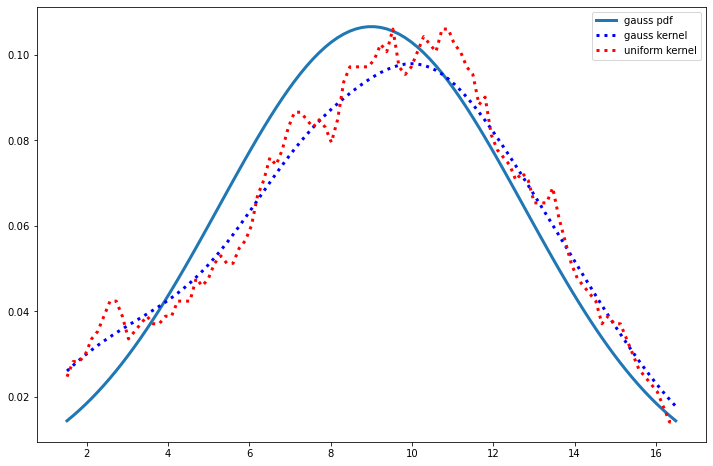

In [134]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[12,8])

ax.plot(grid, gauss_pdf, linestyle = '-', linewidth = 3)
ax.plot(grid, gauss_kernel_estimation, linestyle = ':', linewidth = 3, color = 'blue')
ax.plot(grid, uniform_kernel_estimation, linestyle = ':', linewidth = 3, color = 'red')

plt.legend(['gauss pdf', 'gauss kernel', 'uniform kernel'])
plt.show()

#### 2. Распределение равномерное.

In [135]:
a = 5
b = 7

uniform = np.random.default_rng().uniform(low=a, high=b, size=n)
grid, uniform_pdf, gauss_kernel_estimation, uniform_kernel_estimation = uniform_estimation(uniform, a, b)

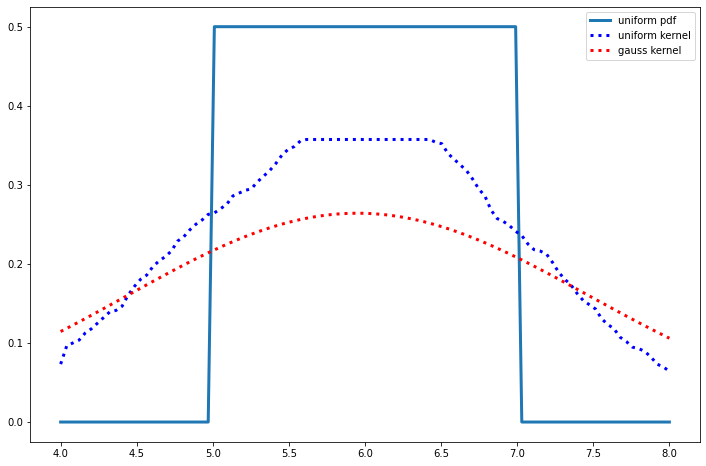

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[12,8])

ax.plot(grid, uniform_pdf, linestyle = '-', linewidth = 3)
ax.plot(grid, uniform_kernel_estimation, linestyle = ':', linewidth = 3, color = 'blue')
ax.plot(grid, gauss_kernel_estimation, linestyle = ':', linewidth = 3, color = 'red')

plt.legend(['uniform pdf', 'uniform kernel', 'gauss kernel'])
plt.show()

### III. Линейная регрессия.

In [184]:
from sklearn import linear_model

In [142]:
def pearson_coef(x, y):
    return 1 / (n-1) * sum((x - np.mean(x)) * (y - np.mean(y)) / (np.std(x) * np.std(y)))

In [ ]:
def print_data(x,y,k):
    print(f'MU- : {mu_lower} < MU: {np.mean(group_gauss)} < MU+: {mu_higher}')

In [181]:
p = n // 10

#### 1.Простая регрессия.

    a.Распределение Гаусса

In [147]:
x = stat.norm.rvs(loc=0, scale=1,size=n)
x_group = group_data(x,k)
gauss_noise = stat.norm.rvs(loc=0, scale=1,size=n)

y_gauss = 5 + 2 * x + gauss_noise
regr_gauss = stat.linregress(x, y=y_gauss)

slope = pearson_coef(x,y_gauss) * np.std(y_gauss) / np.std(x)
intercept = np.mean(y_gauss) - slope * np.mean(x)

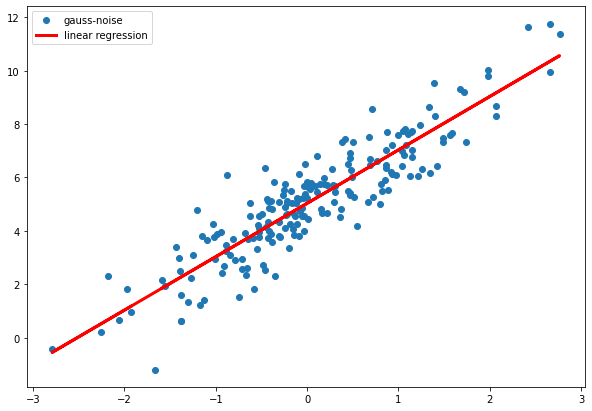

In [167]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,7])

ax.plot(x, y_gauss, 'o', linewidth = 3)
ax.plot(x, regr_gauss.intercept + regr_gauss.slope * x, linestyle = '-', linewidth = 3, color = 'red')

plt.legend(['gauss-noise', 'linear regression'])
plt.show()

    b.Распределение равномерное

In [158]:
a = -3
b = 3
uniform_noise = np.random.default_rng().uniform(low=a, high=b, size=n)

y_uniform = 2 + 5 * x + uniform_noise
regr_uniform = stat.linregress(x, y=y_uniform)

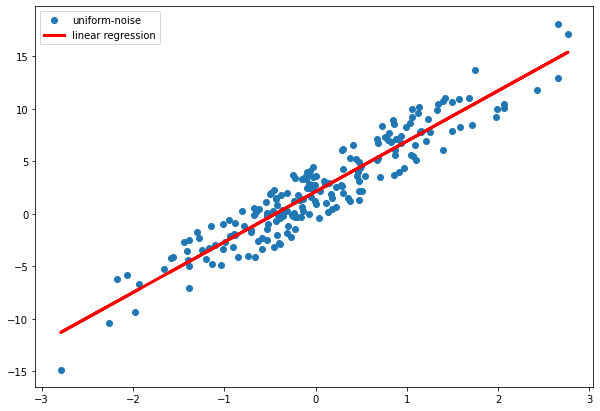

In [168]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,7])

ax.plot(x, y_uniform, 'o', linewidth = 3)
ax.plot(x, regr_uniform.intercept + regr_uniform.slope*x, linestyle = '-', linewidth = 3, color = 'red')

plt.legend(['uniform-noise', 'linear regression'])
plt.show()

    c.Распределение Коши

In [174]:
cauchy_noise = stat.cauchy.rvs(loc = 0, scale = 1, size=n)

y_cauchy = 2 + 5 * x + cauchy_noise
regr_cauchy = stat.linregress(x, y=y_cauchy)

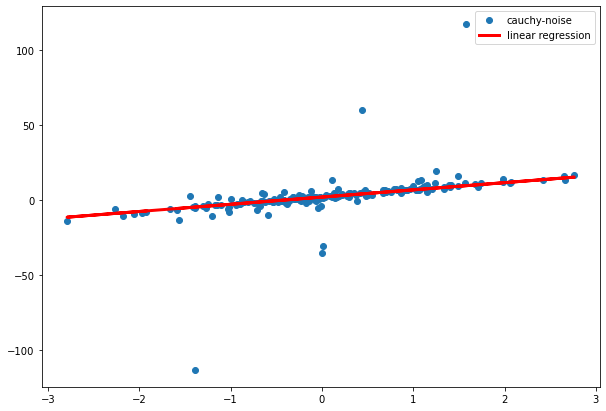

In [175]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,7])

ax.plot(x, y_cauchy, 'o', linewidth = 3)
ax.plot(x, regr_uniform.intercept + regr_uniform.slope*x, linestyle = '-', linewidth = 3, color = 'red')

plt.legend(['cauchy-noise', 'linear regression'])
plt.show()

#### 2.Многомерная регессия.

In [185]:
noise_var = 3

x = stat.norm.rvs(loc=0, scale=1,size=n)
x_powers = np.array([np.array([xi**i for i in range(1, p + 1)]) for xi in x])
y_gauss = 4 * np.sin(2 * x + 4) + stat.norm.rvs(loc=0, scale=noise_var**0.5,size=n)

clf = linear_model.LinearRegression() 
clf.fit(x_powers,y_gauss)

LinearRegression()

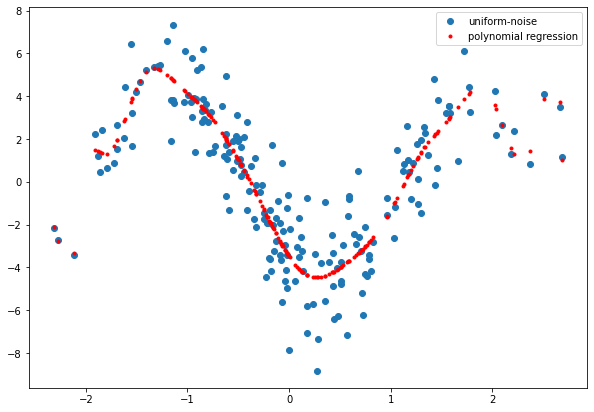

In [190]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,7])

ax.plot(x, y_gauss, 'o', linewidth = 3)
ax.plot(x, x_powers @ clf.coef_ + clf.intercept_, '.', linewidth = 5, color = 'red')

plt.legend(['uniform-noise', 'polynomial regression'])
plt.show()